In [1]:
#%pip install cartopy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


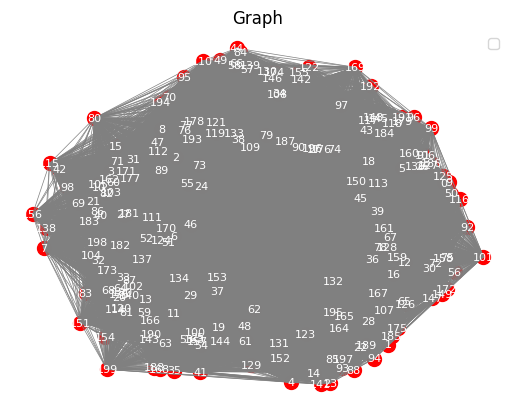

In [ ]:
import numpy as np
import random
from Graphs.RandomGraph import RandomGraph
from Graphs.MapGraph import MapGraph
random.seed(0)
np,random.seed(0)

        
cities = [
    "Boos", "Rouen", "Franqueville-Saint-Pierre", "Le Mesnil-Esnard", "Saint-Etienne-Du-Rouvray",
    "Montmain", "Bois-Guillaume", "Bonsecours", "Sotteville-lès-Rouen", "Mont-Saint-Aignan",
    "Le Grand-Quevilly", "Le Petit-Quevilly", "Canteleu", "Déville-lès-Rouen", "Darnétal",
    "Elbeuf", "Oissel", "Maromme", "Cléon", "Saint-Aubin-lès-Elbeuf", "Saint-Aubin-Celloville",
    "Saint-Martin-du-Vivier", "Saint-Jacques-sur-Darnétal", "Saint-Léger-du-Bourg-Denis",
    "Saint-Pierre-de-Manneville", "Saint-Pierre-de-Varengeville", "Saint-Martin-de-Boscherville",
    "Saint-Aubin-Épinay", "Saint-Paër", "Isneauville", "Hénouville", "Houppeville", "Malaunay",
    "Jumièges", "La Bouille", "Duclair", "Notre-Dame-de-Bondeville", "Petit-Couronne"
]
# cities = ["Rouen", "Saint-Etienne-Du-Rouvray","Mont-Saint-Aignan", "Bonsecours"]

# cities = ["Bouffry","Yermenonville","Valennes","Mondoubleau","Arquenay", "Nantes", "Boos", "La Rochelle", "Bordeaux", "Toulouse", "Montpellier", "Marseille", "Lyon", "Le Mans", "Riom","Bergerac","Vic-sur-Cère", "Clermont-Ferrand","Sucé-sur-Erdre", "Rezé","Rieux"]
#cities = ["Marseille", "Rouen", "Lille", "Quimper", "Colmar", "Paris", "Bayonne", "Toulouse"]
#create real graph
# graph = MapGraph(cities=cities,start_city="Rouen")
graph = RandomGraph(node_number=500,min_weight=1,max_weight=100)
graph.plot_graph()

In [3]:
#Filtration
edge_blocking_percentage = 0
edge_costly_percentage = 0
graph.apply_edge_blocking(percentage=edge_blocking_percentage)
graph.apply_edge_costly(percentage=edge_costly_percentage)

if(edge_blocking_percentage > 0 or edge_costly_percentage > 0):
    graph.plot_graph()

Algorithm GENETIC : 



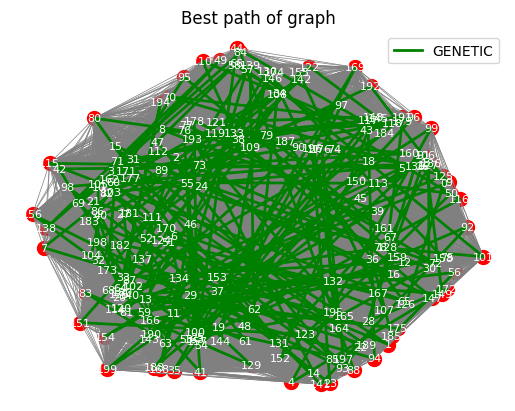

Execution time : 1.907973051071167 s (1907.973051071167 ms)
Best paths: [[0, 192, 183, 1, 177, 7, 189, 3, 133, 110, 43, 35, 169, 19, 144, 130, 24, 147, 121, 148, 152, 50, 150, 53, 17, 164, 31, 145, 122, 151, 123, 158, 146, 107, 21, 180, 198, 34, 66, 138, 49, 10, 69, 129, 83, 190, 39, 8, 26, 167, 182, 142, 60, 113, 154, 99, 4, 172, 28, 136, 45, 188, 74, 155, 81, 56, 185, 36, 11, 46, 135, 194, 20, 175, 68, 128, 179, 171, 78, 101, 139, 62, 108, 86, 95, 12, 33, 119, 72, 89, 90, 120, 125, 70, 118, 193, 191, 199, 106, 149, 153, 29, 143, 111, 57, 168, 134, 170, 162, 100, 156, 93, 22, 82, 97, 48, 91, 9, 114, 197, 176, 195, 63, 40, 104, 165, 76, 163, 117, 94, 64, 102, 27, 52, 137, 6, 141, 92, 159, 132, 25, 44, 184, 87, 2, 181, 14, 77, 161, 131, 15, 16, 140, 5, 115, 65, 51, 61, 13, 174, 124, 85, 47, 58, 116, 157, 178, 109, 32, 105, 112, 30, 127, 42, 166, 75, 59, 41, 55, 54, 96, 196, 23, 98, 18, 37, 80, 38, 160, 73, 173, 71, 84, 88, 103, 186, 67, 79, 187, 126, 0]]
Total distance: 4162.03188592035

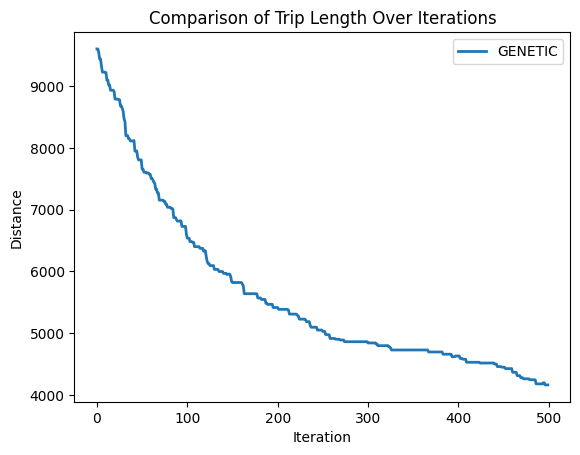

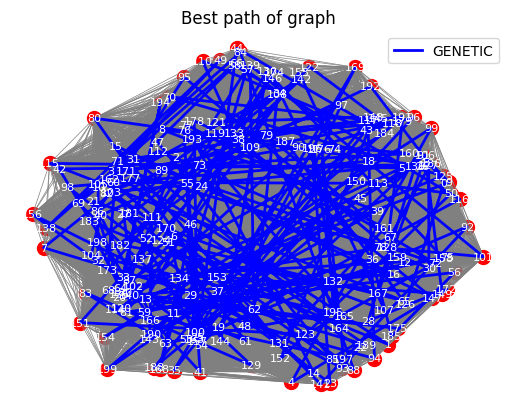

In [ ]:
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Algorithms.Greedy.GreedyAlgo import GreedyAlgo
from Algorithms.Tabu.TabuAlgo import TabuAlgo
from Algorithms.Genetic.GeneticAlgo import GeneticAlgo
from utils.plot import Plot

def run_algorithm(graph,algorithm):
    algorithm.run()
    print(f"Algorithm {algorithm.name} : \n")
    vehicles_paths = {i + 1: path for i, path in enumerate(algorithm.paths)}
    current_path_results = {}
    current_path_results[algorithm.name] = vehicles_paths
    algorithms_path_results[algorithm.name] = current_path_results[algorithm.name]
    algorithms_distance_results[algorithm.name] = algorithm.distance_history
    # Print the best path found and the total distance
    graph.plot_graph(current_path_results)
    print(f"Execution time : {algorithm.execution_time} s ({algorithm.execution_time * 1000} ms)")
    print(f"Best paths: {algorithm.paths}")
    print(f"Total distance: { algorithm.distance}")
    print(f"Distance per vehicles  : {algorithm.distance_per_vehicles}")
    print(f"Average distance for each vehicles : {algorithm.distance_average_per_vehicles}")
    print(f"Standard deviation distance for each vehicles : {algorithm.distance_standard_deviation_per_vehicles}")
    print(f"Number of iterations needed to find the solution : {algorithm.iterations_needed}")
    print(f"Total number of iterations : {algorithm.total_interations_realized}")
    

def run_algorithms(graph, algorithms):
    for algorithm in algorithms:
        run_algorithm(graph,algorithm)
    Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)
    graph.plot_graph(algorithms_path_results)


algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 500
max_iterations = 100000
convergence_threshold = 100
num_vehicles = 1
ACO = AcoAlgo(graph,"ACO",num_vehicles,200,0.5,1,2,min_iterations,max_iterations,convergence_threshold)
GREEDY = GreedyAlgo(graph,"GREEDY",num_vehicles,min_iterations,max_iterations,convergence_threshold)
TABU = TabuAlgo(graph,"TABU",num_vehicles,10,min_iterations,max_iterations,convergence_threshold)
GENETIC = GeneticAlgo(graph, "GENETIC",num_vehicles,20,min_iterations=min_iterations, max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [GENETIC]
run_algorithms(graph= graph,algorithms=algorithms)
